In [ ]:
import math

In [9]:
# 離散化モデルでの式
def f1(h, e_n, i_n1, i_n):
    return (2/h)*(i_n1-i_n)-e_n

def f2(h, v_n, i_n1, i_n):
    return (h/2)*(i_n1+i_n)+v_n

def f3(h,e_n,v_n,i_n):
    return ((2*h)/(4+0.4*h+h**2))*(1+e_n-v_n)+((4-h**2)/(4+0.4*h+h**2))*i_n


import matplotlib.pyplot as plt

def gauss_jacobi(h, e_n, v_n, i_n):
    time = []
    current = []
    voltage = []
    for i in range(1000):

        i_n1 = f3(h, e_n, v_n, i_n)
        e_n1 = f1(h, e_n, i_n1, i_n)
        v_n1 = f2(h, v_n, i_n1, i_n)
        
        i_n = i_n1     # 新しい値の代入
        e_n = e_n1     # 新しい値の代入
        v_n = v_n1     # 新しい値の代入

        time.append(h*i)
        current.append(i_n)
        voltage.append(v_n)
    return time, current, voltage
        # print(i,"回目 : ", 'i_n: {:.4f}'.format(i_n),' e_n: {:.4f}'.format(e_n),' v_n: {:.4f}'.format(v_n))


In [ ]:
#　厳密解の式
def i(t):
    return (1/math.sqrt(0.99))*math.exp(-0.1*t)*math.sin(math.sqrt(0.99)*t)
def v(t):
    return 1-(0.1/math.sqrt(0.99))*math.exp(-0.1*t)*math.sin(math.sqrt(0.99)*t)-math.exp(-0.1*t)*math.cos(math.sqrt(0.99)*t)

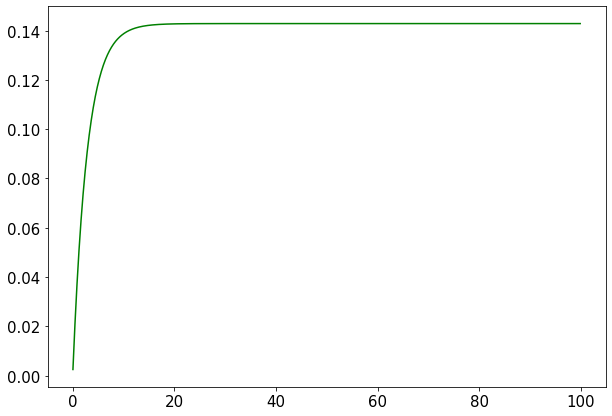

In [10]:
import matplotlib.pyplot as plt

x, y ,z = gauss_jacobi(0.1, 0,0,0)

plt.figure(figsize=(10,7))
plt.tick_params(labelsize=15)
# 緑色のサインカーブを描く
plt.plot(x, z, color = "green")

In [5]:
gauss_jacobi(0.1,0,0,0)

0 回目 :  i_n: 0.0494  e_n: 0.9877  v_n: 0.0025
1 回目 :  i_n: 0.1469  e_n: 0.9633  v_n: 0.0073
2 回目 :  i_n: 0.2421  e_n: 0.9395  v_n: 0.0121
3 回目 :  i_n: 0.3349  e_n: 0.9163  v_n: 0.0167
4 回目 :  i_n: 0.4254  e_n: 0.8937  v_n: 0.0213
5 回目 :  i_n: 0.5136  e_n: 0.8716  v_n: 0.0257
6 回目 :  i_n: 0.5997  e_n: 0.8501  v_n: 0.0300
7 回目 :  i_n: 0.6837  e_n: 0.8291  v_n: 0.0342
8 回目 :  i_n: 0.7655  e_n: 0.8086  v_n: 0.0383
9 回目 :  i_n: 0.8454  e_n: 0.7886  v_n: 0.0423
10 回目 :  i_n: 0.9233  e_n: 0.7692  v_n: 0.0462
11 回目 :  i_n: 0.9993  e_n: 0.7502  v_n: 0.0500
12 回目 :  i_n: 1.0734  e_n: 0.7317  v_n: 0.0537
13 回目 :  i_n: 1.1456  e_n: 0.7136  v_n: 0.0573
14 回目 :  i_n: 1.2161  e_n: 0.6960  v_n: 0.0608
15 回目 :  i_n: 1.2848  e_n: 0.6788  v_n: 0.0642
16 回目 :  i_n: 1.3519  e_n: 0.6620  v_n: 0.0676
17 回目 :  i_n: 1.4173  e_n: 0.6457  v_n: 0.0709
18 回目 :  i_n: 1.4810  e_n: 0.6297  v_n: 0.0741
19 回目 :  i_n: 1.5432  e_n: 0.6142  v_n: 0.0772
20 回目 :  i_n: 1.6039  e_n: 0.5990  v_n: 0.0802
21 回目 :  i_n: 1.6631  e